`Cortix` 2019 **03Aug2019**

# Criminal Justice Dynamics Example
* This is part of the [Cortix](https://cortix.org) Notebook [guides](https://github.com/dpploy/cortix-nb)
([index](https://github.com/dpploy/cortix-nb/blob/master/droplet.ipynb)).
* Select each of the cells below and run them sequentially (use the run button, `>|` on the tool bar or use the `Cell` option on the menu bar).
* Alternatively, on the menu bar run all cells: `Cell -> Run All`.

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\vvar}{\boldsymbol{v}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\Power}{\mathcal{P}}
  \newcommand{\bm}[1]{{\boldsymbol{#1}}}
$

---
## Table of Contents
* [Introduction](#intro)
  - [Prison population model](#prisonmodel)
  - [Parole population model](#parolemodel)
  - [Street population model](#streetmodel)
  - [Jail population model](#jailmodel)
* [Write a Cortix run file](#runfile)
* [Verify the network connectivity](#net)
* [Run the network simulation](#run)
* [Results inspection through Cortix](#inspect)
   - [Results: Prison](#prison)
   - [Results: Parole](#parole)
   - [Results: Adjudication](#adjudication)
---

## Introduction<a id="intro"></a>

This Cortix use-case simulates the population dynamics across the network of a criminal justice system.

### Prison node population model<a id="prisonmodel"></a>

The equation for the population balance in the prison node is:

\begin{equation*}
  d_t f_{\text{p}_g}  = I_{\text{p}_g} - O_{\text{p}_g} - D_{\text{p}_g} ,
\end{equation*}

where $f_{\text{p}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{p}_g}(t)$ is the population inflow for group $g$, $O_{\text{p}_g}(t)$ is the outflow, and $D_{\text{p}_g}(t)$ is the death rate term in prison for a given group $g$. The inflow and outflow rates depend on the particular coupling to the prison node. For example, the contribution from the "adjucation" node (awaiting adjudication) to the prison inflow is proposed as follows:

\begin{equation*}
c_\text{a,p}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,p}^{(g)}  ,
\end{equation*}

where $c_\text{a,p}^{(g)}$ is the commitment rate to "prison" from the "adjucation" for the population group $g$ (adjucation "a" to prison "p"), $f_{\text{a}_g}(t)$ is the population in the "adjucation" node, and $\mu_{\text{a}_g}$ is a conviction rate modifier. These group-dependent multiplying coefficients could be time dependent.

Hence a tentative form of inflow reads

\begin{equation*}
I_{\text{p}_g}(t) = c_\text{a,p}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,p}^{(g)} + 
                    c_\text{j,p}^{(g)} \, f_{\text{j}_g}(t) \, \mu_\text{j,p}^{(g)} +
                    c_\text{e,p}^{(g)} \, f_{\text{e}_g}(t) \, \mu_\text{e,p}^{(g)} ,
\end{equation*}

where the last two terms refer to the "jail" node and "parole" nodes respectively.  Note that the inflow is dependent on populations from distinct nodes ($f_{\text{a}_g}$, $f_{\text{j}_g}$ and $f_{\text{e}_g}$).

A tentative form for the outflow is similar but with one key difference

\begin{equation*}
O_{\text{p}_g}(t) = c_\text{p,0}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,0}^{(g)} +
                    c_\text{p,e}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,e}^{(g)} ,
\end{equation*}

that is, the rates are dependent on the population in prison. The first coefficient (or time-dependent) quantity is the unconditional rate of outflow associated to the prison population, $c_\text{p,0}^{(g)}$,  and the second coefficient is its modifier $\mu_\text{p,0}^{(g)}$. The second term corresponds to the outflow of the prison population group to the parole node. This is better expressed as

\begin{equation*}
O_{\text{p}_g}(t) = \bigl( c_\text{p,0}^{(g)} \, \mu_\text{p,0}^{(g)} +
                           c_\text{p,e}^{(g)}  \mu_\text{p,e}^{(g)} \big) \, f_{\text{p}_g}(t) .
\end{equation*}

All together the prison population balance gives

\begin{equation*}
d_t f_{\text{p}_g}(t) = 
     \bigl( c_\text{a,p}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,p}^{(g)} +  
            c_\text{j,p}^{(g)} \, f_{\text{j}_g}(t) \, \mu_\text{j,p}^{(g)} +  
            c_\text{e,p}^{(g)} \, f_{\text{e}_g}(t) \, \mu_\text{e,p}^{(g)}  
     \bigr) - 
     \bigl( c_\text{p,0}^{(g)} \, \mu_\text{p,0}^{(g)} + 
            c_\text{p,e}^{(g)} \, \mu_\text{p,e}^{(g)}
     \big) \,f_{\text{p}_g}(t) -
     D_{\text{p}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on populations on external nodes, the second term depends on the prison population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{p}_g}$ term is non-zero which is always the case; no one lives for ever, less so in prison.

### Parole node population model<a id="parolemodel"></a>

The equation for the population balance in the parole node is similar as before:

\begin{equation*}
  d_t f_{\text{e}_g}  = I_{\text{e}_g} - O_{\text{e}_g} - D_{\text{e}_g} ,
\end{equation*}

where $f_{\text{e}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{e}_g}(t)$ is the population inflow for group $g$, $O_{\text{e}_g}(t)$ is the outflow, and $D_{\text{e}_g}(t)$ is the death rate term in parole for a given group $g$. The inflow and outflow rates depend on the particular coupling to the prison node that is,

\begin{equation*}
  I_{\text{e}_g}(t) = c_\text{p,e}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,e}^{(g)}.
\end{equation*}

Note this term is the outflow term in the prison node model. Likewise the outflow term in the parole node has two contributions and it reads

\begin{equation*}
 O_{\text{e}_g}(t) = \bigl( 
                     c_\text{e,0}^{(g)} \, \mu_\text{e,0}^{(g)} + 
                     c_\text{e,p}^{(g)} \, \mu_\text{e,p}^{(g)} 
                     \bigr)
                     f_{\text{e}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the second is a familiar term from the prison population balance.
Hence overall we have

\begin{equation*}
d_t f_{\text{e}_g}(t) = 
     \bigl( c_\text{p,e}^{(g)} \, f_{\text{p}_g}(t) \, \mu_\text{p,e}^{(g)} \bigr) - 
     \bigl( c_\text{e,0}^{(g)} \, \mu_\text{e,0}^{(g)} + 
            c_\text{e,p}^{(g)} \, \mu_\text{e,p}^{(g)}
     \big) \,f_{\text{e}_g}(t) -
     D_{\text{e}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on populations on external nodes (only the prison), the second term depends on the parole population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{e}_g}$ term is non-zero which is always the case; no one lives for ever.

### Adjucation node population model<a id="streetmodel"></a>

The equation for the population balance in the adjucation node is similar as before also:

\begin{equation*}
  d_t f_{\text{a}_g}  = I_{\text{a}_g} - O_{\text{a}_g} - D_{\text{a}_g} ,
\end{equation*}

where $f_{\text{a}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{a}_g}(t)$ is the population inflow for group $g$, $O_{\text{a}_g}(t)$ is the outflow, and $D_{\text{a}_g}(t)$ is the death rate term in adjucation for a given group $g$. The inflow and outflow rates depend on the particular coupling to the arrested ("r")
node as follows:

\begin{equation*}
  I_{\text{a}_g}(t) = c_\text{r,a}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,a}^{(g)}.
\end{equation*}

Note this term will be the same as the outflow term of the arrested node model to the adjucation node model. Likewise the outflow term in the adjucation node has four contributions and it reads

\begin{equation*}
 O_{\text{a}_g}(t) = \bigl( 
                     c_\text{a,0}^{(g)} \, \mu_\text{a,0}^{(g)} + 
                     c_\text{a,j}^{(g)} \, \mu_\text{a,j}^{(g)} +
                     c_\text{a,b}^{(g)} \, \mu_\text{a,b}^{(g)} +
                     c_\text{a,p}^{(g)} \, \mu_\text{a,p}^{(g)}   
                     \bigr)
                     f_{\text{a}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the other terms associated to the jail, probation, and prison nodes, respectively.
Hence overall we have

\begin{equation*}
d_t f_{\text{a}_g}(t) = 
     \bigl( c_\text{r,a}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,a}^{(g)} \bigr) - 
     \bigl( c_\text{a,0}^{(g)} \, \mu_\text{a,0}^{(g)} + 
            c_\text{a,j}^{(g)} \, \mu_\text{a,j}^{(g)} +
            c_\text{a,b}^{(g)} \, \mu_\text{a,b}^{(g)} +
            c_\text{a,p}^{(g)} \, \mu_\text{a,p}^{(g)}
     \big) \,f_{\text{a}_g}(t) -
     D_{\text{a}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on a population on a external node (only the arrested node), the second term depends on the adjucation population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{a}_g}$ term is non-zero which is always the case.

### Jail node population model<a id="jailmodel"></a>

The equation for the population balance in the jail node is similar as before also:

\begin{equation*}
  d_t f_{\text{j}_g}  = I_{\text{j}_g} - O_{\text{j}_g} - D_{\text{j}_g} ,
\end{equation*}

where $f_{\text{j}_g}(t)$ is the population for group $g$ at time $t$, $I_{\text{j}_g}(t)$ is the population inflow for group $g$, $O_{\text{j}_g}(t)$ is the outflow, and $D_{\text{j}_g}(t)$ is the death rate term in jail for a given group $g$. The inflow and outflow rates depend on the particular coupling to the arrested ("r"), probation ("b") and adjucation ("a") nodes as follows:

\begin{equation*}
  I_{\text{j}_g}(t) = c_\text{r,j}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,j}^{(g)} +
                      c_\text{b,j}^{(g)} \, f_{\text{b}_g}(t) \, \mu_\text{b,j}^{(g)} +
                      c_\text{a,j}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,j}^{(g)} .
\end{equation*}

Note this term will be the same as the outflow term of the respective models: arrested, probation and adjucation nodes model to the jail node model. Likewise the outflow term in the jail node has two contributions and it reads

\begin{equation*}
 O_{\text{j}_g}(t) = \bigl( 
                     c_\text{j,0}^{(g)} \, \mu_\text{j,0}^{(g)} + 
                     c_\text{j,p}^{(g)} \, \mu_\text{j,p}^{(g)}   
                     \bigr)
                     f_{\text{j}_g}(t),
\end{equation*}

the first term being the outflow to freedom and the other terms associated to the prison node, respectively.
Hence overall we have

\begin{equation*}
d_t f_{\text{j}_g}(t) = 
     \bigl( c_\text{r,j}^{(g)} \, f_{\text{r}_g}(t) \, \mu_\text{r,j}^{(g)} +
            c_\text{b,j}^{(g)} \, f_{\text{b}_g}(t) \, \mu_\text{b,j}^{(g)} +
            c_\text{a,j}^{(g)} \, f_{\text{a}_g}(t) \, \mu_\text{a,j}^{(g)}
            \bigr) - 
     \bigl( c_\text{j,0}^{(g)} \, \mu_\text{j,0}^{(g)} + 
            c_\text{j,p}^{(g)} \, \mu_\text{j,p}^{(g)}
     \big) \,f_{\text{j}_g}(t) -
     D_{\text{j}_g} ,
\end{equation*}

where the first term in parenthesis on the right side depends on a population on a external node (only the arrested node), the second term depends on the adjucation population, and the third term is likely a constant for each group. This population balance is non-conservative if the $D_{\text{a}_g}$ term is non-zero which is always the case.

## Write the run context<a id="runfile"></a>

In [1]:
# Import various packages; must have the Cortix repository installed

import matplotlib.pyplot as plt

try:
    import cortix  # creates the `name` cortix
except ImportError:
    print('Installing the "cortix" package...')
    print('')
    !pip install cortix --no-deps
    !pip install pandas networkx scipy numpy matplotlib
    import cortix

import scipy.constants as const

from cortix.src.module import Module
from cortix.src.cortix_main import Cortix

from cortix.examples.prison import Prison
from cortix.examples.parole import Parole
from cortix.examples.adjudication import Adjudication

In [2]:
# Setup parameters
end_time  = 100 * const.day
time_step = 0.5 * const.day
n_groups  = 5   # number of population groups

# Create a Cortix object with Python multiprocessing
cortix = Cortix(use_mpi=False)

[37190] 2019-08-04 02:13:02,256 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

In [3]:
# Create the application network

prison = Prison(n_groups=n_groups)
cortix.add_module(prison)
prison.end_time = end_time
prison.time_step = time_step

parole = Parole(n_groups=n_groups)
cortix.add_module(parole)
parole.end_time = end_time
parole.time_step = time_step

adjudication = Adjudication(n_groups=n_groups)
cortix.add_module(adjudication)
adjudication.end_time = end_time
adjudication.time_step = time_step

prison.connect( 'parole', parole.get_port('prison') )
adjudication.connect( 'prison', prison.get_port('adjudication') )

## Verify the network connectivity<a id="net"></a>

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


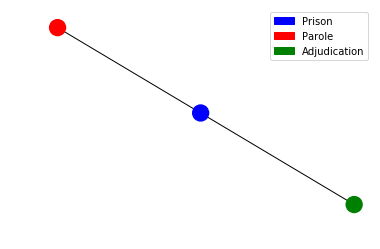

In [4]:
# View the Cortix network created

cortix.draw_network()
plt.show()

## Run network simulation<a id="run"></a>

In [5]:
# Run the simulation!

cortix.run()

[37190] 2019-08-04 02:13:02,471 - cortix - INFO - Launching Module <cortix.examples.prison.Prison object at 0x1520ac6048>
[37190] 2019-08-04 02:13:02,477 - cortix - INFO - Launching Module <cortix.examples.parole.Parole object at 0x101f1532b0>
[37190] 2019-08-04 02:13:02,484 - cortix - INFO - Launching Module <cortix.examples.adjudication.Adjudication object at 0x152091bc18>
[37190] 2019-08-04 02:13:04,535 - cortix - INFO - Module <cortix.examples.parole.Parole object at 0x101f1532b0> getting new state
[37190] 2019-08-04 02:13:04,538 - cortix - INFO - Module <cortix.examples.adjudication.Adjudication object at 0x152091bc18> getting new state
[37190] 2019-08-04 02:13:04,540 - cortix - INFO - Module <cortix.examples.prison.Prison object at 0x1520ac6048> getting new state


## Results inspection through Cortix<a id="inspect"></a>

In [6]:
'''List of modules in Cortix'''

cortix.modules

In [7]:
'''Attach to modules'''

prison=cortix.modules[0]
parole=cortix.modules[1]
adjudication=cortix.modules[2]

### Prison module<a id="prison"></a>

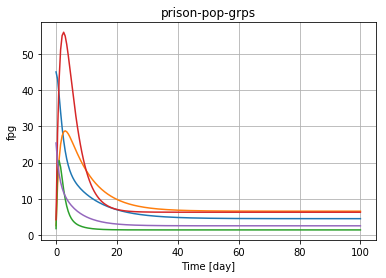

In [8]:
'''Prison Module State'''

population_phase = prison.state
(fpg_quant, time_unit) = population_phase.get_quantity_history('fpg')

fpg_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

### Parole module<a id="parole"></a>

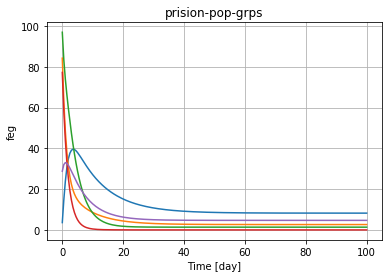

In [9]:
'''Parole Module State'''

population_phase = parole.state
(feg_quant, time_unit) = population_phase.get_quantity_history('feg')

feg_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()

### Adjudication module<a id="adjudication"></a>

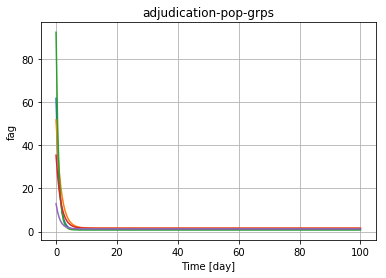

In [10]:
'''Adjucation Module State'''

population_phase = adjudication.state
(fag_quant, time_unit) = population_phase.get_quantity_history('fag')

fag_quant.plot( x_scaling=1/const.day, x_label='Time [day]')
plt.grid()
plt.show()